In [1]:
#Importing Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
pd.set_option("display.float_format",lambda x : "%.2f" %x)

# STEP-1 Reading the dataset

In [ ]:

zomato_real=pd.read_csv("zomato (5).csv",encoding="latin-1",usecols=range(17))


In [ ]:
zomato_real.head(2)

### STEP-2  Looking at the information about the dataset, datatypes of the coresponding columns and missing values

In [ ]:
zomato_real.info() 

# STEP-3 Find and Remove the Duplicate rows

In [ ]:

zomato_real.duplicated().sum()



In [ ]:
zomato_real.drop_duplicates(inplace=True)

In [ ]:
zomato_real.reset_index(inplace=True,drop=True)

# STEP-4 Find NaN values

In [ ]:
zomato_real.isnull().mean()*100

# STEP-5 Reading columns name

In [ ]:

zomato_real.columns

# STEP-6 Changing the columns name,if needed

In [ ]:

zomato_real = zomato_real.rename(columns={'approx_cost(for two people)':'cost','listed_in(type)':'type',
                                  'listed_in(city)':'city'})
zomato_real.columns

# STEP-7 FEATURE CLEANSING 

In [ ]:
zomato=zomato_real.copy()

In [ ]:
zomato["book_table"].unique()

In [ ]:
a=[]
for i,j in enumerate(zomato["book_table"]):
    if j=="Yes" or j=="No":
        pass
    else:
        a.append(i)

In [ ]:
len(a)

In [ ]:
zomato.iloc[a].head(2)

In [ ]:
zomato_new=zomato.drop(a,axis=0)

In [ ]:
zomato_new.reset_index(drop=True,inplace=True)

In [ ]:
zomato_new["book_table"].unique()

In [ ]:
zomato_new["cost"].unique()

In [ ]:
zomato_new["cost"]=zomato_new["cost"].apply(lambda x:x.replace(',','') if type(x)!=float else x)

In [ ]:
zomato_new["cost"]=zomato_new["cost"].astype(str)
zomato_new["cost"]=zomato_new["cost"].apply(lambda x:x.replace(',',''))
zomato_new["cost"]=zomato_new["cost"].apply(lambda x:x.strip('+'))
zomato_new["cost"]=zomato_new["cost"].astype("float")

In [ ]:
zomato_new["cost"].unique()

In [ ]:
zomato_new["rate"].unique()

In [ ]:
zomato_new["rate"]=zomato_new["rate"].astype(str)
zomato_new["rate"]=zomato_new["rate"].apply(lambda x: x[0:3])

In [ ]:
zomato_new["rate"].unique()

In [ ]:
zomato_new["rate"]=zomato_new["rate"].replace("-",np.nan)
zomato_new["rate"]=zomato_new["rate"].replace("NEW",np.nan)
zomato_new["rate"]=zomato_new["rate"].replace('nan',np.nan)

In [ ]:
zomato_new["rate"]=zomato_new["rate"].astype("float")

In [ ]:
zomato_new["rate"].unique()

In [ ]:
zomato_new["votes"].unique()

In [ ]:
for i,j in enumerate(zomato_new["votes"]):
    try:
        if type(float(j))==float:
            pass
    except :
        print(i,j)
    

In [ ]:
zomato_new["votes"]=zomato_new["votes"].astype("str")

In [ ]:
zomato_new["votes"]=zomato_new["votes"].apply(lambda x : x.replace(",",""))

In [ ]:
zomato_new["votes"]=zomato_new["votes"].astype("int")

In [ ]:
zomato_new.info()

# STEP-8 Deleting Unnnecessary Columns

In [ ]:
zomato_new=zomato_new.drop(["name",'url',"dish_liked",'phone','address','reviews_list','menu_item','location'],axis=1) 

In [ ]:
zomato_new.head()

In [ ]:
zomato_new.info()

In [ ]:
zomato_new=zomato_new.reset_index(drop=True)

In [ ]:
zomato_new.info()

# STEP-9 Data Visualization

### A) Restaurants delivering Online or not

In [ ]:
zomato_new["online_order"].value_counts()

In [ ]:
a=plt.figure(figsize=(15,5))
ax=sns.countplot(zomato_new,x='online_order',palette="rocket")
plt.title('Restaurants delivering online or Not')
for container in ax.containers:
    ax.bar_label(container)
plt.show()

### B) Restaurants allowing table booking or not

In [ ]:
b=plt.figure(figsize=(15,5))
ax=sns.countplot(zomato_new,x='book_table',palette="flare")
plt.title('Restaurants allowing table booking or not')
for container in ax.containers:
    ax.bar_label(container)

plt.show()

#### Table booking Rate vs Normal Rate

In [ ]:
Y = pd.crosstab(zomato_new['rate'], zomato_new['book_table'])


In [ ]:
Y

In [ ]:
Y.plot(kind = 'bar', stacked = True,color=['maroon','green'],figsize=(18,8))
plt.title('table booking rate', fontweight = 30, fontsize = 30)
plt.xticks(fontsize=10,fontweight='bold')
plt.legend(loc="upper right")
plt.show()

#### Online Order Rate vs Normal Rate

In [ ]:
Y = pd.crosstab(zomato_new['rate'], zomato_new['online_order'])


In [ ]:
Y.plot(kind = 'bar', stacked = True,color=['maroon','olive'],figsize=(18,8))
plt.title('Online Order Rate', fontweight = 30, fontsize = 30)
plt.xticks(fontsize=10,fontweight='bold')
plt.legend(loc="upper right")
plt.show()

#### Location

In [ ]:
d=plt.figure(figsize=(22,8))

ax=sns.countplot(zomato_new,x='city')
sns.countplot(zomato_new,x='city').set_xticklabels(sns.countplot(zomato_new,x='city').get_xticklabels(), rotation=90, ha="right",fontweight='bold')
plt.title('Location wise count for restaurants')
for container in ax.containers:
    ax.bar_label(container)


plt.show()

#### Location and Rating

In [ ]:
zomato_new['city'].value_counts().head(10).index

In [ ]:
zom_loc=[i for i in zomato_new['city'].value_counts().head(10).index ]

In [ ]:
zom_loc

In [ ]:
zom_top_loc=zomato_new.loc[zomato_new["city"].isin(zom_loc)]

In [ ]:
zom_top_loc

In [ ]:
loc_plt=pd.crosstab(zom_top_loc['rate'],zom_top_loc['city'])
loc_plt

In [ ]:
loc_plt.plot(kind='bar',stacked=True,figsize=(25,10));
plt.title('Locationwise Rating',fontsize=15,fontweight='bold')
plt.ylabel('Location',fontsize=15,fontweight='bold')
plt.xlabel('Rating',fontsize=20,fontweight='bold')
plt.xticks(fontsize=15,fontweight='bold')
plt.yticks(fontsize=15,fontweight='bold')
plt.legend(loc="best");

#### Restaurant Type

In [ ]:
zomato_new["rest_type"].nunique()

In [ ]:
top_10=[i for i in zomato_new["rest_type"].value_counts().head(10).index]

In [ ]:
top_10

In [ ]:
zoomzto_top10=zomato_new.loc[zomato_new["rest_type"].isin(top_10)]

In [ ]:
zoomzto_top10["rest_type"].value_counts()

In [ ]:
plt.figure(figsize=(30,10))
ax=sns.countplot(zoomzto_top10,x='rest_type')
sns.countplot(zoomzto_top10,x='rest_type').set_xticklabels(sns.countplot(zoomzto_top10,x='rest_type').get_xticklabels(), rotation=90, ha="right",fontweight='bold')
plt.xlabel('rest_type',fontsize=20,fontweight='bold')
plt.title('Restuarant Type',fontsize=30)
for container in ax.containers:
    ax.bar_label(container)
plt.show()

#### Type of rest vs Rating

In [ ]:
loc_plt=pd.crosstab(zoomzto_top10['rate'],zomato_new['rest_type'])
loc_plt

In [ ]:
loc_plt.plot(kind='bar',stacked=True,figsize=(25,10));
plt.title('Rest_Type Rating',fontsize=15,fontweight='bold')
plt.ylabel('Rest_Type',fontsize=15,fontweight='bold')
plt.xlabel('Rating',fontsize=20,fontweight='bold')
plt.xticks(fontsize=15,fontweight='bold')
plt.yticks(fontsize=15,fontweight='bold')
plt.legend(loc="best");

#### Types of Services

In [ ]:
plt.figure(figsize=(20,8))
ax=sns.countplot(zomato_new,x='type')
sns.countplot(zomato_new,x='type').set_xticklabels(sns.countplot(zomato_new,x='type').get_xticklabels(), rotation=90, ha="right")
plt.title('Type of Service')
for container in ax.containers:
    ax.bar_label(container)
plt.show()

#### Type and Rating

In [ ]:
type_plt=pd.crosstab(zomato_new['rate'],zomato_new['type'])
type_plt.plot(kind='bar',stacked=True,figsize=(25,10))
plt.title('Type - Rating',fontsize=15,fontweight='bold')
plt.ylabel('Type',fontsize=10,fontweight='bold')
plt.xlabel('Rating',fontsize=10,fontweight='bold')
plt.xticks(fontsize=10,fontweight='bold')
plt.yticks(fontsize=10,fontweight='bold');

#### Cost of Restuarant

In [ ]:
plt.figure(figsize=(25,8))
sns.countplot(zomato_new,x='cost')
sns.countplot(zomato_new,x='cost').set_xticklabels(sns.countplot(zomato_new,x='cost').get_xticklabels(), rotation=90, ha="right",fontweight='bold')
plt.title('Cost of Restuarant')
plt.show()

In [ ]:
top_10_cost=[i for i in zomato_new["cost"].value_counts().head(10).index]

In [ ]:
top_10_cost

In [ ]:
zom_10_cost=zomato_new.loc[zomato_new["cost"].isin(top_10_cost)]

In [ ]:
zom_10_cost["cost"].value_counts()

In [ ]:
type_plt=pd.crosstab(zom_10_cost['rate'],zom_10_cost['cost'])
type_plt.plot(kind='bar',stacked=True,figsize=(25,10))
plt.title('Cost - Rating',fontsize=15,fontweight='bold')
plt.ylabel('Cost',fontsize=10,fontweight='bold')
plt.xlabel('Rating',fontsize=10,fontweight='bold')
plt.xticks(fontsize=10,fontweight='bold')
plt.yticks(fontsize=10,fontweight='bold');

In [ ]:
zomato_new.isnull().sum()

## Cuisine Analysis

In [ ]:
zomato_new.head()

In [ ]:
zomato_new["cuisines_list"]=zomato["cuisines"].apply(lambda x:x.split(",") if type(x)!=float else x)

In [ ]:
for i in zomato_new["cuisines_list"]:
    for j in i:
        print(j)
        break
        

In [ ]:
count=0
for i in zomato_new["cuisines_list"]:
    if type(i)==list:
        for j in i:
            a=j.title().strip()
            if a=="North Indian":
                count+=1
                break
            else:
                continue
            

In [ ]:
count

In [179]:
zomato_new["cuisines"][0].split(",")

['North Indian', ' Mughlai', ' Chinese']

In [94]:
zomato_new["cuisines"]=zomato_new["cuisines"].apply(lambda x: x.split(",") if type(x)!=float else np.nan)

In [95]:
zomato_new["cuisines"]

0                [North Indian,  Mughlai,  Chinese]
1                   [Chinese,  North Indian,  Thai]
2                        [Cafe,  Mexican,  Italian]
3                     [South Indian,  North Indian]
4                       [North Indian,  Rajasthani]
                            ...                    
51712                                 [Continental]
51713                                 [Finger Food]
51714                                 [Finger Food]
51715                                 [Finger Food]
51716    [Finger Food,  North Indian,  Continental]
Name: cuisines, Length: 51717, dtype: object

In [96]:
zomato_cus=zomato_new.copy()

In [97]:
df_cus=zomato_cus.explode("cuisines")

In [98]:
df_cus

,name,online_order,book_table,rate,votes,rest_type,cuisines,cost,type,city,cuisines_list
0,Jalsa,Yes,Yes,4.10,775,Casual Dining,North Indian,800.00,Buffet,Banashankari,"[North Indian, Mughlai, Chinese]"
0,Jalsa,Yes,Yes,4.10,775,Casual Dining,Mughlai,800.00,Buffet,Banashankari,"[North Indian, Mughlai, Chinese]"
0,Jalsa,Yes,Yes,4.10,775,Casual Dining,Chinese,800.00,Buffet,Banashankari,"[North Indian, Mughlai, Chinese]"
1,Spice Elephant,Yes,No,4.10,787,Casual Dining,Chinese,800.00,Buffet,Banashankari,"[Chinese, North Indian, Thai]"
1,Spice Elephant,Yes,No,4.10,787,Casual Dining,North Indian,800.00,Buffet,Banashankari,"[Chinese, North Indian, Thai]"
...,...,...,...,...,...,...,...,...,...,...,...
51714,Plunge - Sheraton Grand Bengaluru Whitefield H...,No,No,NaN,0,Bar,Finger Food,2000.00,Pubs and bars,Whitefield,"[Biryani, Kebab]"
51715,Chime - Sheraton Grand Bengaluru Whitefield Ho...,No,Yes,4.30,236,Bar,Finger Food,2500.00,Pubs and bars,Whitefield,"[South Indian, Biryani]"
51716,The Nest - The Den Bengaluru,No,No,3.40,13,"Bar, Casual Dining",Finger Food,1500.00,Pubs and bars,Whitefield,[ ('Rated 5.0']
51716,The Nest - The Den Bengaluru,No,No,3.40,13,"Bar, Casual Dining",North Indian,1500.00,Pubs and bars,Whitefield,[ ('Rated 5.0']


In [184]:
df_cus["cuisines"].value_counts()

 Chinese         12481
North Indian     12299
 North Indian     8786
 Fast Food        5504
South Indian      5010
                 ...  
 German              3
 Indian              2
 Malwani             2
Belgian              1
Singaporean          1
Name: cuisines, Length: 190, dtype: int64

In [99]:
df_cus["cuisines"]=df_cus["cuisines"].apply(lambda x:x.lower().strip() if type(x)==str else x)

In [100]:
df_cus["cuisines"].value_counts()

north indian    21085
chinese         15547
south indian     8644
fast food        8096
biryani          6492
                ...  
sindhi              4
pan asian           3
hot dogs            3
indian              2
malwani             2
Name: cuisines, Length: 107, dtype: int64

In [106]:
df_cus["city"].value_counts().head(10).index

Index(['BTM', 'Koramangala 7th Block', 'Koramangala 4th Block',
       'Koramangala 5th Block', 'Koramangala 6th Block', 'Jayanagar',
       'JP Nagar', 'Indiranagar', 'Church Street', 'HSR'],
      dtype='object')

In [108]:
top10=[i for i in df_cus["city"].value_counts().head(10).index]

In [110]:
top=df_cus.loc[df_cus["city"].isin(top10)]

In [114]:
top.shape

(53509, 11)

In [117]:
top["cuisines"].value_counts().head(10)

north indian    8903
chinese         6759
fast food       3710
south indian    3522
biryani         2790
desserts        2451
beverages       2252
cafe            2174
continental     2127
italian         1220
Name: cuisines, dtype: int64

In [122]:
w=[i for i in top["cuisines"].value_counts().head(10).index ]

In [123]:
w

['north indian',
 'chinese',
 'fast food',
 'south indian',
 'biryani',
 'desserts',
 'beverages',
 'cafe',
 'continental',
 'italian']

In [124]:
top_cus=top.loc[top["cuisines"].isin([i for i in top["cuisines"].value_counts().head(10).index ])]

In [128]:
pd.crosstab(top_cus["city"],top_cus["cuisines"],margins=True)

cuisines,beverages,biryani,cafe,chinese,continental,desserts,fast food,italian,north indian,south indian,All
city,,,,,,,,,,,
BTM,331,406,283,972,241,300,530,132,1294,474,4963
Church Street,99,148,215,462,246,204,250,125,601,291,2641
HSR,154,251,112,481,152,180,290,78,698,263,2659
Indiranagar,160,202,220,435,243,217,254,123,618,243,2715
JP Nagar,201,247,168,593,117,220,331,92,794,361,3124
Jayanagar,262,265,228,688,153,235,408,121,882,410,3652
Koramangala 4th Block,269,330,261,777,261,280,414,148,1003,367,4110
Koramangala 5th Block,257,333,199,809,241,269,415,130,1036,379,4068
Koramangala 6th Block,241,283,232,714,223,258,386,129,909,337,3712


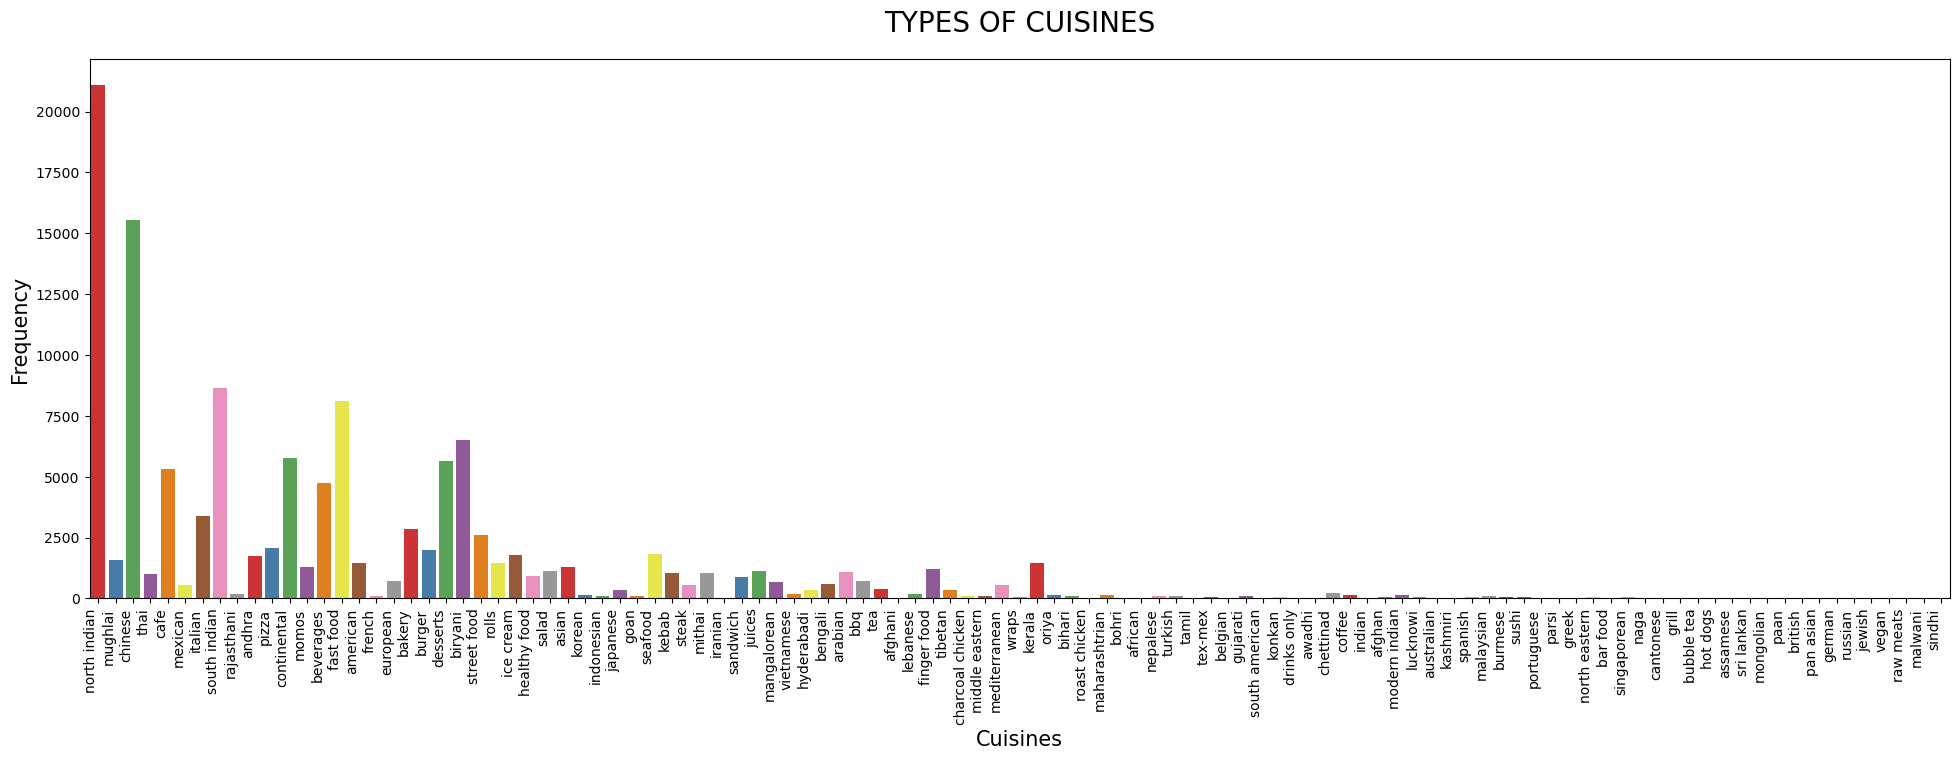

In [187]:
fig = plt.figure(figsize=(24,7))
rest = sns.countplot(x="cuisines",data=df_cus, palette = "Set1")
rest.set_xticklabels(rest.get_xticklabels(), rotation=90, ha="right")
plt.ylabel("Frequency",size=15)
plt.xlabel("Cuisines",size=15)

plt.title('TYPES OF CUISINES',fontsize = 20 ,pad=20)
plt.show()

# Feature Engineering 

In [188]:
zomato_new.head()

,name,online_order,book_table,rate,votes,rest_type,cuisines,cost,type,city
0,Jalsa,Yes,Yes,4.10,775,Casual Dining,"[North Indian, Mughlai, Chinese]",800.00,Buffet,Banashankari
1,Spice Elephant,Yes,No,4.10,787,Casual Dining,"[Chinese, North Indian, Thai]",800.00,Buffet,Banashankari
2,San Churro Cafe,Yes,No,3.80,918,"Cafe, Casual Dining","[Cafe, Mexican, Italian]",800.00,Buffet,Banashankari
3,Addhuri Udupi Bhojana,No,No,3.70,88,Quick Bites,"[South Indian, North Indian]",300.00,Buffet,Banashankari
4,Grand Village,No,No,3.80,166,Casual Dining,"[North Indian, Rajasthani]",600.00,Buffet,Banashankari


### dropping irrelevant columns like cuisines,name

In [189]:
zomato_new.drop(["cuisines","name"],axis=1,inplace=True)

In [190]:
zomato_new.isnull().mean()*100

online_order    0.00
book_table      0.00
rate           19.44
votes           0.00
rest_type       0.44
cost            0.67
type            8.43
city            8.43
dtype: float64

In [191]:
zomato_new1=zomato_new.copy()

In [192]:
zomato_new1.head()

,online_order,book_table,rate,votes,rest_type,cost,type,city
0,Yes,Yes,4.10,775,Casual Dining,800.00,Buffet,Banashankari
1,Yes,No,4.10,787,Casual Dining,800.00,Buffet,Banashankari
2,Yes,No,3.80,918,"Cafe, Casual Dining",800.00,Buffet,Banashankari
3,No,No,3.70,88,Quick Bites,300.00,Buffet,Banashankari
4,No,No,3.80,166,Casual Dining,600.00,Buffet,Banashankari


In [193]:
from sklearn.impute import SimpleImputer
from sklearn.impute import KNNImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import OrdinalEncoder

In [194]:
from sklearn.compose import ColumnTransformer

In [195]:
pipeline = ColumnTransformer(transformers=[
    ('hmv',SimpleImputer(strategy="most_frequent"),['rest_type',"city"]),
    ("knn",KNNImputer(),["cost","rate"]),
    #('oe',OrdinalEncoder(categories=[['poor','good',"verygood"]]),['rate']),
    ('ohe',OneHotEncoder(sparse=False,drop='first'),["online_order","book_table"])
],remainder='drop')


In [196]:
pipeline

ColumnTransformer(transformers=[('hmv', SimpleImputer(strategy='most_frequent'),
                                 ['rest_type', 'city']),
                                ('knn', KNNImputer(), ['cost', 'rate']),
                                ('ohe',
                                 OneHotEncoder(drop='first', sparse=False),
                                 ['online_order', 'book_table'])])

In [197]:
zomato_new2=pipeline.fit_transform(zomato_new1)

In [198]:
zomato_new2

array([['Casual Dining', 'Banashankari', 800.0, 4.1, 1.0, 1.0],
       ['Casual Dining', 'Banashankari', 800.0, 4.1, 1.0, 0.0],
       ['Cafe, Casual Dining', 'Banashankari', 800.0, 3.8, 1.0, 0.0],
       ...,
       ['Bar', 'Whitefield', 2000.0, 4.1, 0.0, 0.0],
       ['Bar', 'Whitefield', 2500.0, 4.3, 0.0, 1.0],
       ['Bar, Casual Dining', 'Whitefield', 1500.0, 3.4, 0.0, 0.0]],
      dtype=object)

In [199]:
zomato_new3=pd.DataFrame(zomato_new2,columns=['rest_type', 'city',"cost","rate",'online_order','book_table'])

In [200]:
zomato_new3.head()

,rest_type,city,cost,rate,online_order,book_table
0,Casual Dining,Banashankari,800.00,4.10,1.00,1.00
1,Casual Dining,Banashankari,800.00,4.10,1.00,0.00
2,"Cafe, Casual Dining",Banashankari,800.00,3.80,1.00,0.00
3,Quick Bites,Banashankari,300.00,3.70,0.00,0.00
4,Casual Dining,Banashankari,600.00,3.80,0.00,0.00


In [201]:
zomato_new3.isnull().sum()

rest_type       0
city            0
cost            0
rate            0
online_order    0
book_table      0
dtype: int64

In [202]:
zomato_new3=pd.concat([zomato_new3,zomato_new1["votes"]],axis=1)

In [203]:
zomato_new3.head()

,rest_type,city,cost,rate,online_order,book_table,votes
0,Casual Dining,Banashankari,800.00,4.10,1.00,1.00,775
1,Casual Dining,Banashankari,800.00,4.10,1.00,0.00,787
2,"Cafe, Casual Dining",Banashankari,800.00,3.80,1.00,0.00,918
3,Quick Bites,Banashankari,300.00,3.70,0.00,0.00,88
4,Casual Dining,Banashankari,600.00,3.80,0.00,0.00,166


# Frequency Encoding for rest_type and city

In [204]:
zomato_new3["city"].value_counts()

BTM                      7423
Koramangala 7th Block    2664
Koramangala 5th Block    2544
Koramangala 4th Block    2530
Koramangala 6th Block    2323
Jayanagar                2225
JP Nagar                 1946
Indiranagar              1713
Church Street            1655
HSR                      1599
Brigade Road             1577
Bannerghatta Road        1547
Lavelle Road             1528
MG Road                  1525
Marathahalli             1509
Whitefield               1497
Brookefield              1437
Residency Road           1392
Old Airport Road         1256
Kalyan Nagar             1237
Basavanagudi             1222
Kammanahalli             1220
Electronic City          1190
Sarjapur Road            1151
Bellandur                1141
Frazer Town              1113
Malleshwaram             1025
Rajajinagar               996
Banashankari              836
New BEL Road              696
Name: city, dtype: int64

In [205]:
top5_city=[i for i in zomato_new3["city"].value_counts().head(5).index]

In [206]:
top5_city

['BTM',
 'Koramangala 7th Block',
 'Koramangala 5th Block',
 'Koramangala 4th Block',
 'Koramangala 6th Block']

In [207]:
for i in top5_city:
    zomato_new3[i]=np.where(zomato_new3["city"]==i,1,0)

In [208]:
zomato_new3.head()

,rest_type,city,cost,rate,online_order,book_table,votes,BTM,Koramangala 7th Block,Koramangala 5th Block,Koramangala 4th Block,Koramangala 6th Block
0,Casual Dining,Banashankari,800.00,4.10,1.00,1.00,775,0,0,0,0,0
1,Casual Dining,Banashankari,800.00,4.10,1.00,0.00,787,0,0,0,0,0
2,"Cafe, Casual Dining",Banashankari,800.00,3.80,1.00,0.00,918,0,0,0,0,0
3,Quick Bites,Banashankari,300.00,3.70,0.00,0.00,88,0,0,0,0,0
4,Casual Dining,Banashankari,600.00,3.80,0.00,0.00,166,0,0,0,0,0


In [209]:
pd.set_option("display.max_rows",None)

In [210]:
top5_restype=[i for i in zomato_new3["rest_type"].value_counts().head(5).index]

In [211]:
top5_restype

['Quick Bites', 'Casual Dining', 'Cafe', 'Delivery', 'Dessert Parlor']

In [212]:
for i in top5_restype:
    zomato_new3[i]=np.where(zomato_new3["rest_type"]==i,1,0)

In [213]:
zomato_new3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51717 entries, 0 to 51716
Data columns (total 17 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   rest_type              51717 non-null  object
 1   city                   51717 non-null  object
 2   cost                   51717 non-null  object
 3   rate                   51717 non-null  object
 4   online_order           51717 non-null  object
 5   book_table             51717 non-null  object
 6   votes                  51717 non-null  int32 
 7   BTM                    51717 non-null  int32 
 8   Koramangala 7th Block  51717 non-null  int32 
 9   Koramangala 5th Block  51717 non-null  int32 
 10  Koramangala 4th Block  51717 non-null  int32 
 11  Koramangala 6th Block  51717 non-null  int32 
 12  Quick Bites            51717 non-null  int32 
 13  Casual Dining          51717 non-null  int32 
 14  Cafe                   51717 non-null  int32 
 15  Delivery           

In [214]:
zomato_new3.head()

,rest_type,city,cost,rate,online_order,book_table,votes,BTM,Koramangala 7th Block,Koramangala 5th Block,Koramangala 4th Block,Koramangala 6th Block,Quick Bites,Casual Dining,Cafe,Delivery,Dessert Parlor
0,Casual Dining,Banashankari,800.00,4.10,1.00,1.00,775,0,0,0,0,0,0,1,0,0,0
1,Casual Dining,Banashankari,800.00,4.10,1.00,0.00,787,0,0,0,0,0,0,1,0,0,0
2,"Cafe, Casual Dining",Banashankari,800.00,3.80,1.00,0.00,918,0,0,0,0,0,0,0,0,0,0
3,Quick Bites,Banashankari,300.00,3.70,0.00,0.00,88,0,0,0,0,0,1,0,0,0,0
4,Casual Dining,Banashankari,600.00,3.80,0.00,0.00,166,0,0,0,0,0,0,1,0,0,0


In [215]:
zomato_new3.columns 

Index(['rest_type', 'city', 'cost', 'rate', 'online_order', 'book_table',
       'votes', 'BTM', 'Koramangala 7th Block', 'Koramangala 5th Block',
       'Koramangala 4th Block', 'Koramangala 6th Block', 'Quick Bites',
       'Casual Dining', 'Cafe', 'Delivery', 'Dessert Parlor'],
      dtype='object')

In [216]:
zomato_new3.drop(["rest_type","city"],axis=1,inplace=True)

In [217]:
zomato_new3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51717 entries, 0 to 51716
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   cost                   51717 non-null  object
 1   rate                   51717 non-null  object
 2   online_order           51717 non-null  object
 3   book_table             51717 non-null  object
 4   votes                  51717 non-null  int32 
 5   BTM                    51717 non-null  int32 
 6   Koramangala 7th Block  51717 non-null  int32 
 7   Koramangala 5th Block  51717 non-null  int32 
 8   Koramangala 4th Block  51717 non-null  int32 
 9   Koramangala 6th Block  51717 non-null  int32 
 10  Quick Bites            51717 non-null  int32 
 11  Casual Dining          51717 non-null  int32 
 12  Cafe                   51717 non-null  int32 
 13  Delivery               51717 non-null  int32 
 14  Dessert Parlor         51717 non-null  int32 
dtypes: int32(11), objec

In [218]:
zomato_new3["cost"]=zomato_new3["cost"].astype("float")
zomato_new3["rate"]=zomato_new3["rate"].astype("float")

zomato_new3["online_order"]=zomato_new3["online_order"].astype("int")
zomato_new3["book_table"]=zomato_new3["book_table"].astype("int")




In [219]:
zomato_new3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51717 entries, 0 to 51716
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   cost                   51717 non-null  float64
 1   rate                   51717 non-null  float64
 2   online_order           51717 non-null  int32  
 3   book_table             51717 non-null  int32  
 4   votes                  51717 non-null  int32  
 5   BTM                    51717 non-null  int32  
 6   Koramangala 7th Block  51717 non-null  int32  
 7   Koramangala 5th Block  51717 non-null  int32  
 8   Koramangala 4th Block  51717 non-null  int32  
 9   Koramangala 6th Block  51717 non-null  int32  
 10  Quick Bites            51717 non-null  int32  
 11  Casual Dining          51717 non-null  int32  
 12  Cafe                   51717 non-null  int32  
 13  Delivery               51717 non-null  int32  
 14  Dessert Parlor         51717 non-null  int32  
dtypes:

# checking outlier treatment

In [220]:
zomato_out=zomato_new3[["rate","cost","votes"]]

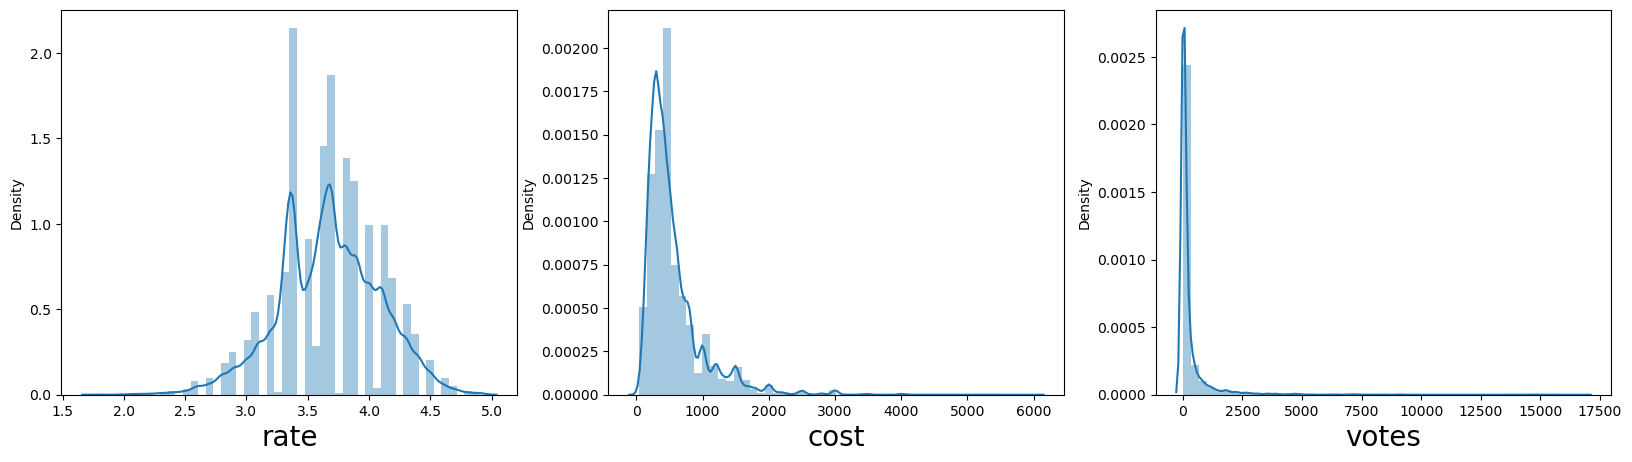

In [221]:
plt.figure(figsize=(20,5))
plotnumber=1
for i in zomato_out:
        ax=plt.subplot(1,3,plotnumber)
        sns.distplot(zomato_out[i])
        plt.xlabel(i,fontsize=20)
        plotnumber+=1
plt.show()

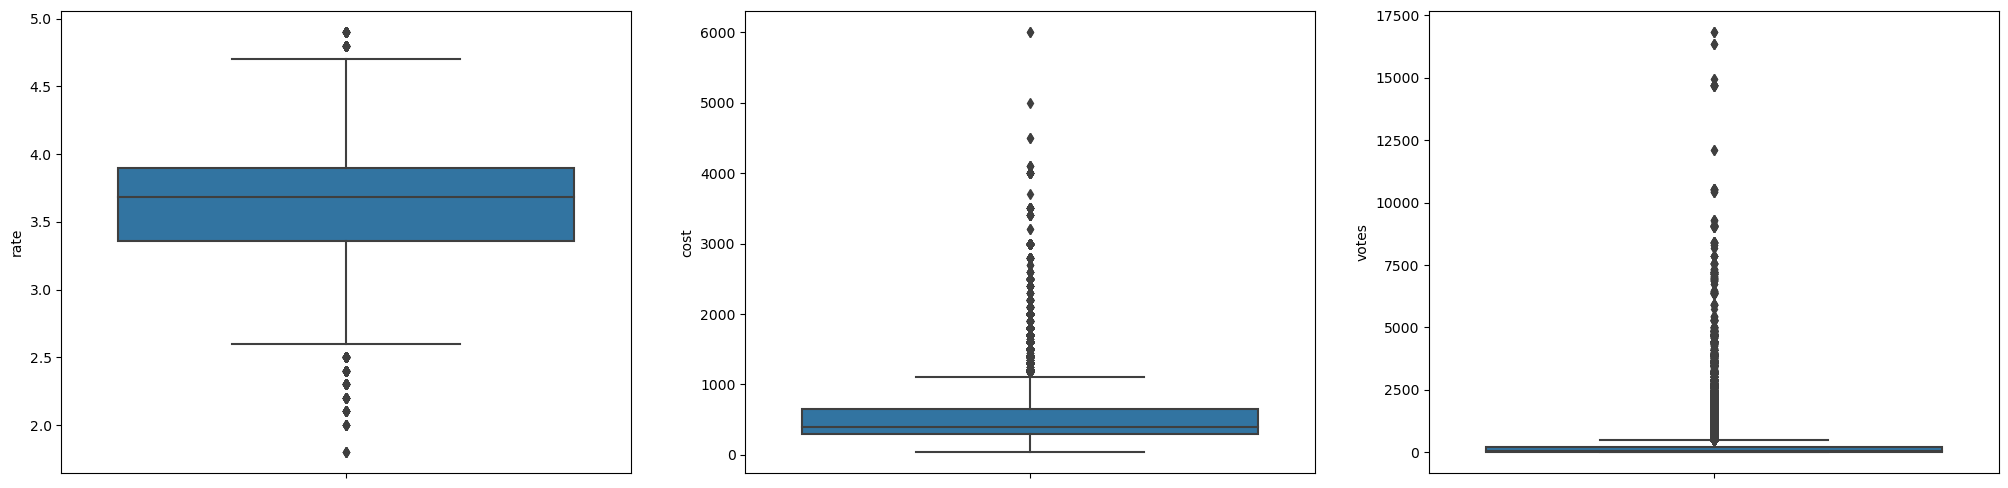

In [222]:
plt.figure(figsize=(25,6))
plotnumber=1
for i in zomato_out:
    ax=plt.subplot(1,3,plotnumber)
    sns.boxplot(y=zomato_out[i])
    plotnumber+=1
plt.show()

In [223]:
q1=zomato_out["cost"].quantile(.25)

In [224]:
q1

300.0

In [225]:
q3=zomato_out["cost"].quantile(.75)

In [226]:
q3

650.0

In [227]:
iqr=q3-q1

In [228]:
iqr

350.0

In [229]:
uo=q3+(1.5*iqr)

In [230]:
uo

1175.0

In [231]:
len(zomato_new3.loc[zomato_new3["cost"]>1175])

4804

In [232]:
zomato_final=zomato_new3.loc[zomato_new3["cost"]<=1175]

In [233]:
zomato_final.head()

,cost,rate,online_order,book_table,votes,BTM,Koramangala 7th Block,Koramangala 5th Block,Koramangala 4th Block,Koramangala 6th Block,Quick Bites,Casual Dining,Cafe,Delivery,Dessert Parlor
0,800.00,4.10,1,1,775,0,0,0,0,0,0,1,0,0,0
1,800.00,4.10,1,0,787,0,0,0,0,0,0,1,0,0,0
2,800.00,3.80,1,0,918,0,0,0,0,0,0,0,0,0,0
3,300.00,3.70,0,0,88,0,0,0,0,0,1,0,0,0,0
4,600.00,3.80,0,0,166,0,0,0,0,0,0,1,0,0,0


# MODEL BUILDING

In [234]:
zomato_new3.shape

(51717, 15)

In [235]:
x=zomato_new3.drop(["cost"],axis=1)

In [236]:
x.shape

(51717, 14)

In [237]:
y=zomato_new3["cost"]

In [238]:
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor

In [239]:
 model = {
'linear_regression' : {'model': LinearRegression(),'params': {'positive': [True, False]}},
'random_forest': {'model': RandomForestRegressor(),'params': {'n_estimators': [50,100,200,300],'max_samples': [30000,35000]}},
'decision_tree': {'model': DecisionTreeRegressor(),'params': {'max_depth' :[3,5,10,15,20,25,30,35,40,45,50] ,'splitter': ['best','random']}}}

In [240]:
model

{'linear_regression': {'model': LinearRegression(),
  'params': {'positive': [True, False]}},
 'random_forest': {'model': RandomForestRegressor(),
  'params': {'n_estimators': [50, 100, 200, 300],
   'max_samples': [30000, 35000]}},
 'decision_tree': {'model': DecisionTreeRegressor(),
  'params': {'max_depth': [3, 5, 10, 15, 20, 25, 30, 35, 40, 45, 50],
   'splitter': ['best', 'random']}}}

In [196]:
#  model = {
# 'linear_regression' : {'model': LinearRegression(),'params': {'positive': [True, False]}},
# 'random_forest': {'model': RandomForestRegressor(),'params': {'n_estimators': [50,100,200,300],'max_samples': [30000,35000]}},
# 'decision_tree': {'model': DecisionTreeRegressor(),'params': {'max_depth' :[3,5,10,15,20,25,30,35,40,45,50] ,'splitter': ['best','random']}},
# "ada_boosting" : {"model": AdaBoostRegressor(),'params': {'n_estimators': [50,100,200,300]}},
# "gradient_boosting":{"model":GradientBoostingRegressor(),'params': {'n_estimators': [50,100,200,300],"learning_rate":[.1,.2,.3,.4,.5],"max_features" : ['auto', 'sqrt', 'log2']}},
# "support_vector":{"model":SVR(),'params': {"kernel" : ['linear', 'poly', 'rbf', 'sigmoid']}},               
# "knn_regressor":{"model":KNeighborsRegressor(),'params': {"n_neighbors":np.linspace(2,30,29)}}                
#     }

In [241]:
model.items()

dict_items([('linear_regression', {'model': LinearRegression(), 'params': {'positive': [True, False]}}), ('random_forest', {'model': RandomForestRegressor(), 'params': {'n_estimators': [50, 100, 200, 300], 'max_samples': [30000, 35000]}}), ('decision_tree', {'model': DecisionTreeRegressor(), 'params': {'max_depth': [3, 5, 10, 15, 20, 25, 30, 35, 40, 45, 50], 'splitter': ['best', 'random']}})])

In [242]:
for i,j in model.items():
    print(j["params"])

{'positive': [True, False]}
{'n_estimators': [50, 100, 200, 300], 'max_samples': [30000, 35000]}
{'max_depth': [3, 5, 10, 15, 20, 25, 30, 35, 40, 45, 50], 'splitter': ['best', 'random']}


In [243]:
def find_best_model_using_gridsearchcv(x,y):
   
    scores = []
    cv = ShuffleSplit(n_splits=2, test_size=0.2, random_state=0)
    for model_name, config in model.items():
        gs =  GridSearchCV(config['model'], config['params'], cv=cv, return_train_score=False)
        gs.fit(x,y)
        scores.append({
            'model': model_name,
            'best_score': gs.best_score_,
            'best_params': gs.best_params_
        })

    return pd.DataFrame(scores,columns=['model','best_score','best_params'])



In [254]:
x.columns

Index(['rate', 'online_order', 'book_table', 'votes', 'BTM',
       'Koramangala 7th Block', 'Koramangala 5th Block',
       'Koramangala 4th Block', 'Koramangala 6th Block', 'Quick Bites',
       'Casual Dining', 'Cafe', 'Delivery', 'Dessert Parlor'],
      dtype='object')

In [245]:
find_best_model_using_gridsearchcv(x,y)

,model,best_score,best_params
0,linear_regression,0.51,{'positive': False}
1,random_forest,0.90,"{'max_samples': 35000, 'n_estimators': 100}"
2,decision_tree,0.88,"{'max_depth': 25, 'splitter': 'best'}"


In [257]:
model=RandomForestRegressor(max_samples=35000,n_estimators=100)

In [259]:
model.fit(x,y)

RandomForestRegressor(max_samples=35000)

In [ ]:
pip show scikit-learn

In [260]:
import pickle
pickle.dump(model,open("model.pkl","wb"))

In [255]:
model = pickle.load(open("model.pkl", "rb"))

In [256]:
model

RandomForestRegressor(max_samples=35000)

# ANN IMPLEMENTATION

In [405]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LeakyReLU,PReLU,ELU
from tensorflow.keras.layers import Dropout

In [406]:
regressor=Sequential()
regressor.add(Dense(units=14,activation="relu"))
regressor.add(Dense(units=10,activation="ELU"))
regressor.add(Dense(units=1,activation="linear"))
regressor.compile(optimizer='adam',loss="mean_absolute_error")

In [407]:
from sklearn.model_selection import train_test_split

In [430]:
x_train.shape[0]*.67/10

2514.51

In [408]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.20,random_state=0)

In [426]:
model=regressor.fit(x_train,y_train,validation_split=.33,batch_size=10,epochs=20)

Epoch 1/20
2515/2515 [==============================] - 2s 970us/step - loss: 120.7538 - val_loss: 118.7363
Epoch 2/20
2515/2515 [==============================] - 2s 956us/step - loss: 120.8327 - val_loss: 119.1643
Epoch 3/20
2515/2515 [==============================] - 2s 924us/step - loss: 120.8386 - val_loss: 118.9720
Epoch 4/20
2515/2515 [==============================] - 2s 935us/step - loss: 120.4189 - val_loss: 119.3488
Epoch 5/20
2515/2515 [==============================] - 2s 947us/step - loss: 120.2728 - val_loss: 123.4293
Epoch 6/20
2515/2515 [==============================] - 2s 968us/step - loss: 120.3311 - val_loss: 120.3196
Epoch 7/20
2515/2515 [==============================] - 2s 939us/step - loss: 120.0055 - val_loss: 118.3604
Epoch 8/20
2515/2515 [==============================] - 2s 936us/step - loss: 119.9889 - val_loss: 119.8910
Epoch 9/20
2515/2515 [==============================] - 2s 942us/step - loss: 120.2509 - val_loss: 120.6245
Epoch 10/20
2515/2515 [=====

In [168]:
model.model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_9 (Dense)             (None, 14)                210       
                                                                 
 dense_10 (Dense)            (None, 10)                150       
                                                                 
 dense_11 (Dense)            (None, 1)                 11        
                                                                 
Total params: 371
Trainable params: 371
Non-trainable params: 0
_________________________________________________________________


In [419]:
y_pred=regressor.predict(x_test)

294/294 [==============================] - 0s 550us/step


In [423]:
from sklearn.metrics import r2_score,mean_absolute_error

In [425]:
mean_absolute_error(y_test,y_pred)

122.82504535893929